# Chapter 05 離散型確率変数 first

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

## 5.1　|　1 次元の離散型確率変数

In [2]:
# 取りうる値の集合を定義
x_set = np.array([1, 2, 3, 4, 5, 6])

In [3]:
# イカサマサイコロの確率関数を定義

def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [4]:
# 確率変数を定義
X = [x_set, f]
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [5]:
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

Text(0, 0.5, 'probability')

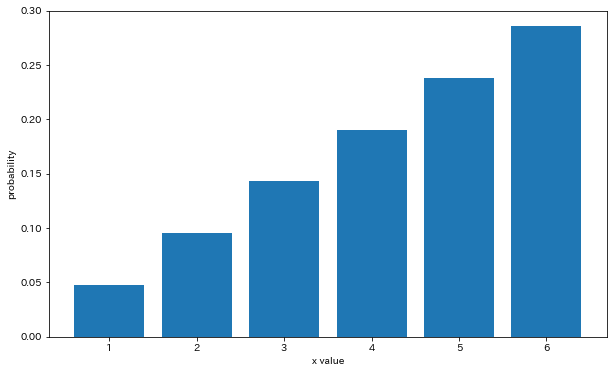

In [6]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('x value')
ax.set_ylabel('probability')

In [7]:
np.all(prob >= 0)

True

In [8]:
np.sum(prob)

0.9999999999999999

In [9]:
# 累積分布関数を定義

def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [10]:
F(3)

0.2857142857142857

In [11]:
# 確率変数の変換

y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

### 5.1.2　1 次元の離散型確率変数の指標

$確率変数 X の期待値 E(X) は \\
E(X) = \sum_{k} x_{k} f(x_{x})$

In [12]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [13]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.334007

In [14]:
# 期待値を関数化する

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [15]:
E(X)

4.333333333333333

$確率変数 X の分散 V(X) は \\
V(X) = \sum_{k} (x_{k} - E(X))^2 f(x_{k})$

In [16]:
E(X, g=lambda x: 2*x + 3)

11.666666666666664

In [17]:
2 * E(X) + 3

11.666666666666666

In [18]:
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [19]:
# 分散を関数化

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

In [20]:
V(X)

2.2222222222222223

In [21]:
V(X, lambda x: 2*x + 3)

8.88888888888889

In [22]:
2**2 * V(X)

8.88888888888889

## 5.2　|　2 次元の離散型確率変数

### 5.2.1　2 次元の離散型確率変数の定義

In [24]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [26]:
def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [27]:
XY = [x_set, y_set, f_XY]

In [28]:
np.all(prob >= 0)

True

In [29]:
np.sum(prob)

0.9999999999999999

In [30]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [31]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [32]:
X = [x_set, f_X]
Y = [y_set, f_Y]

In [33]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666